# Part I - (prosperLoanData dataset)
## by (Nigel Omondi Odongo)

## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.

Below are some of the Variable descriptions:

ListingNumber	The number that uniquely identifies the listing to the public as displayed on the website.

ListingCreationDate	The date the listing was created.

CreditGrade	The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

Term	The length of the loan expressed in months.

LoanStatus	The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

BorrowerRate	The Borrower's interest rate for this loan. 

LenderYield	The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

ListingCategory	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

IsBorrowerHomeowner	A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

CurrentlyInGroup	Specifies whether or not the Borrower was in a group at the time the listing was created.

DateCreditPulled	The date the credit profile was pulled. 

OpenRevolvingAccounts	Number of open revolving accounts at the time the credit profile was pulled.

OpenRevolvingMonthlyPayment	Monthly payment on revolving accounts at the time the credit profile was pulled.

IncomeRange	The income range of the borrower at the time the listing was created.

IncomeVerifiable	The borrower indicated they have the required documentation to support their income.

StatedMonthlyIncome	The monthly income the borrower stated at the time the listing was created.

LoanKey	Unique key for each loan. This is the same key that is used in the API. 

LoanCurrentDaysDelinquent	The number of days delinquent. 																		
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Loading the dataset into the workspace

In [2]:
loans = pd.read_csv('prosperLoanData.csv')

Quick assessment of the structure of the data

In [3]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5526 entries, 0 to 5525
Data columns (total 81 columns):
ListingKey                             5526 non-null object
ListingNumber                          5526 non-null int64
ListingCreationDate                    5526 non-null object
CreditGrade                            1394 non-null object
Term                                   5526 non-null int64
LoanStatus                             5526 non-null object
ClosedDate                             2657 non-null object
BorrowerAPR                            5525 non-null float64
BorrowerRate                           5526 non-null float64
LenderYield                            5526 non-null float64
EstimatedEffectiveYield                4127 non-null float64
EstimatedLoss                          4127 non-null float64
EstimatedReturn                        4127 non-null float64
ProsperRating (numeric)                4127 non-null float64
ProsperRating (Alpha)                  4127 non-

Extracting a random sample of 700 entries from the entire dataset

In [5]:
np.random.seed(2)
df_new = loans.sample(700)

Assessing the new representative sample subset of data

In [6]:
df_new

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
5087,403B3475191991203ADEE68,443638,2010-01-21 08:32:44.227000000,NaN,36,Completed,2011-04-28 00:00:00,0.37352,0.3490,0.3390,...,-15.00,0.00,0.00,0.00,0.00,1.0000,0.0,0.0,0.00,49.0
877,3DCB3567405478720A365B0,699949,2013-01-14 18:12:08.527000000,NaN,36,Current,NaN,0.13138,0.1034,0.0934,...,-119.56,0.00,0.00,0.00,0.00,1.0000,0.0,0.0,0.00,280.0
103,0F843543787869030F017F8,579737,2012-04-17 11:58:52.270000000,NaN,36,Chargedoff,2013-03-22 00:00:00,0.26681,0.2287,0.2187,...,-49.41,-813.65,13880.95,13880.95,1600.00,1.0000,0.0,0.0,0.00,21.0
213,10263383420237035058C79,103628,2007-02-26 10:25:18.177000000,AA,36,Defaulted,2009-01-29 00:00:00,0.16184,0.1499,0.1449,...,-9.14,0.00,913.07,913.07,0.00,1.0000,0.0,0.0,0.00,13.0
4260,49723557958462938D8F38A,639942,2012-09-15 17:28:23.393000000,NaN,60,Current,NaN,0.28930,0.2632,0.2532,...,-91.99,0.00,0.00,0.00,0.00,1.0000,0.0,0.0,0.00,12.0
4459,0F9C35735045474497BCF4C,723211,2013-03-04 21:54:43.317000000,NaN,60,Completed,2014-01-27 00:00:00,0.28386,0.2579,0.2479,...,-104.11,-152.06,0.00,0.00,0.00,1.0000,0.0,0.0,0.00,140.0
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.98,0.00,0.00,0.00,0.00,1.0000,0.0,0.0,0.00,40.0
4579,419E3504505620291ADD7A8,489814,2011-01-04 16:29:32.647000000,NaN,36,Chargedoff,2013-06-15 00:00:00,0.33097,0.2950,0.2850,...,-137.59,0.00,3487.13,2947.12,1004.99,1.0000,0.0,0.0,0.00,161.0
2926,78DC354324999445360DE54,572997,2012-03-28 04:20:43.943000000,NaN,60,Current,NaN,0.27246,0.2468,0.2368,...,-113.76,0.00,0.00,0.00,0.00,1.0000,1.0,1.0,65.28,16.0
2723,0B2E3566368802336215E2A,690996,2012-12-27 14:48:19.363000000,NaN,36,Current,NaN,0.14857,0.1203,0.1103,...,-222.26,0.00,0.00,0.00,0.00,1.0000,0.0,0.0,0.00,392.0


In [7]:
df_new.Term.value_counts()

36    549
60    144
12      7
Name: Term, dtype: int64

In [8]:
df_new['LoanOriginalAmount'].value_counts()

4000.0     92
10000.0    71
15000.0    69
5000.0     50
2000.0     38
3000.0     31
25000.0    29
2500.0     23
7000.0     23
7500.0     22
20000.0    20
8000.0     19
1000.0     19
6000.0     15
3500.0     14
1500.0     10
13000.0    10
9000.0     10
12000.0    10
8500.0      7
5500.0      6
6001.0      5
6500.0      4
4500.0      4
19000.0     4
14000.0     4
16000.0     3
18000.0     3
24000.0     3
3001.0      3
           ..
27500.0     1
6800.0      1
4657.0      1
14586.0     1
2550.0      1
8200.0      1
10250.0     1
7200.0      1
7400.0      1
14400.0     1
1025.0      1
3900.0      1
3927.0      1
5900.0      1
23000.0     1
4600.0      1
6290.0      1
6300.0      1
19500.0     1
2771.0      1
2802.0      1
2750.0      1
19978.0     1
10500.0     1
8009.0      1
3800.0      1
3100.0      1
2854.0      1
4150.0      1
4999.0      1
Name: LoanOriginalAmount, Length: 96, dtype: int64

In [9]:
credit_freq = df_new.CreditGrade.value_counts()
credit_order = credit_freq.index

In [10]:
# converting CreditGrade to a categorical data type

credit_ordinal = df_new['CreditGrade'].value_counts().index.sort_values()

cat_dtype = pd.api.types.CategoricalDtype(ordered=True,categories=credit_ordinal)

df_new['CreditGrade'] = df_new['CreditGrade'].astype(cat_dtype)

In [11]:
df_new.LoanStatus.value_counts()

Current                   355
Completed                 231
Chargedoff                 66
Defaulted                  34
Past Due (31-60 days)       5
Past Due (1-15 days)        3
Past Due (91-120 days)      2
Past Due (61-90 days)       2
FinalPaymentInProgress      1
Past Due (16-30 days)       1
Name: LoanStatus, dtype: int64

In [12]:
# converting LoanStatus to a categorical data type

LoanStatus_ordinal = ['Current', 'Completed','FinalPaymentProgress', 'PastDue(1-15 days)', 'PastDue(16-30 days)',
                      'PastDue(31-60 days)','PastDue(61-90 days)','PastDue(91-120 days)', 'Chargedoff', 'Default']

LoanStatus_dtype = pd.api.types.CategoricalDtype(ordered=True,categories=LoanStatus_ordinal)

df_new['LoanStatus'] = df_new['LoanStatus'].astype(LoanStatus_dtype)

In [13]:
df_new.IsBorrowerHomeowner.value_counts()

True     351
False    349
Name: IsBorrowerHomeowner, dtype: int64

In [14]:
occupation_freq = df_new.Occupation.value_counts()
occupation_freq

Other                                 173
Professional                           83
Executive                              31
Computer Programmer                    26
Administrative Assistant               25
Teacher                                25
Sales - Commission                     25
Accountant/CPA                         24
Analyst                                19
Retail Management                      18
Clerical                               17
Nurse (RN)                             16
Truck Driver                           14
Construction                           13
Skilled Labor                          13
Laborer                                12
Engineer - Mechanical                  12
Sales - Retail                         11
Civil Service                           9
Tradesman - Mechanic                    8
Nurse (LPN)                             8
Food Service                            7
Medical Technician                      7
Attorney                          

In [15]:
occupation_order = occupation_freq.index

In [16]:
df_new.Recommendations.value_counts()

0.0    675
1.0     22
2.0      2
3.0      1
Name: Recommendations, dtype: int64

In [17]:
df_new.IncomeRange.value_counts()

$50,000-74,999    202
$25,000-49,999    188
$100,000+         112
$75,000-99,999    100
Not displayed      53
$1-24,999          34
Not employed        7
$0                  4
Name: IncomeRange, dtype: int64

In [18]:
# converting IncomeRange to a categorical data type

income_order = ['Not employed','Not displayed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
income_cat = pd.api.types.CategoricalDtype(ordered=True,categories=income_order)
df_new['IncomeRange'] = df_new['IncomeRange'].astype(income_cat)

In [19]:
employment_freq = df_new.EmploymentStatus.value_counts()
employment_order = employment_freq.index

In [20]:
df_new['ListingCategory (numeric)'].value_counts()

1     351
0      99
7      56
3      44
2      43
6      24
4      22
13     18
20     10
18      8
15      7
5       5
19      4
11      2
14      2
16      2
8       1
10      1
9       1
Name: ListingCategory (numeric), dtype: int64

In [21]:
# converting ListingCategory to a categorical data type

my_ordinal = df_new['ListingCategory (numeric)'].value_counts().index.sort_values()

categdtype = pd.api.types.CategoricalDtype(ordered=True,categories=my_ordinal)

df_new['ListingCategory (numeric)'] = df_new['ListingCategory (numeric)'].astype(categdtype)

In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 5087 to 1553
Data columns (total 81 columns):
ListingKey                             700 non-null object
ListingNumber                          700 non-null int64
ListingCreationDate                    700 non-null object
CreditGrade                            174 non-null category
Term                                   700 non-null int64
LoanStatus                             652 non-null category
ClosedDate                             331 non-null object
BorrowerAPR                            700 non-null float64
BorrowerRate                           700 non-null float64
LenderYield                            700 non-null float64
EstimatedEffectiveYield                526 non-null float64
EstimatedLoss                          526 non-null float64
EstimatedReturn                        526 non-null float64
ProsperRating (numeric)                526 non-null float64
ProsperRating (Alpha)                  526 non-null obje

### What is the structure of your dataset?

> My sample dataset contains several variables but I'll extract about 15 variables of interest from the entire dataframe.

### What is/are the main feature(s) of interest in your dataset?

I am most interested in figuring out;

> What factors affect a loan’s outcome status?

> What affects the borrower’s APR or interest rate?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following features will help me find out meaningful insights into trends and correlation in the data

LoanStatus
BorrowerAPR	
LoanOriginalAmount 
Occupation     
Term                         
LoanStatus
BorrowerAPR
BorrowerRate              
LenderYield
StatedMonthlyIncome
InvestmentFromFriends
ListingCategory (numeric)      
IsBorrowerHomeowner           
CurrentlyInGroup
EmploymentStatus
DateCreditPulled               
OpenRevolvingAccounts         
OpenRevolvingMonthlyPayment    
IncomeRange                   
IncomeVerifiable                     
Recommendations
CreditScoreRangeLower
CreditScoreRangeUpper
LoanCurrentDaysDelinquent.
Investors

## Univariate Exploration

In [23]:
def myCountPlot(df,xVar,order):
    
    #set plot dimensions
    plt.figure(figsize=[20,5])
    
    #plot
    sb.countplot(data=df_new,x=xVar,color=sb.color_palette()[3],order=order);
    
    #Add title and format
    plt.title(f'''Distribution of {xVar}'''.title(), fontsize=14,weight='bold');
    
    #Add xlabel and format it
    plt.xlabel(xVar.title(),fontsize=10, weight='bold');
    
    #Add ylabel and format it
    plt.ylabel('Frequency'.title(),fontsize=10, weight='bold')
    

#### Question : How are the listings distributed in terms of Occupation?

#### Below is a a univariate visualization by occupation

#### Observation
Other occupations aside from the ones stated here are the most listed, with the least occurence being realtors in the list.

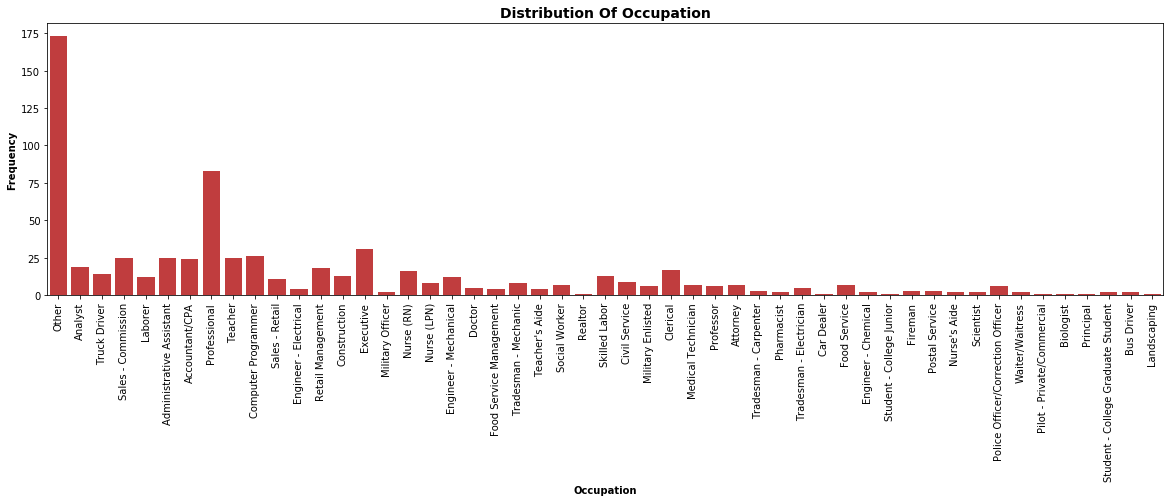

In [24]:
myCountPlot(df_new,'Occupation',None)
plt.xticks(rotation=90);

#### Question : How are the listings distributed in terms of listing category?

#### Below is a a univariate visualization by listing category

#### Observation
The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In this case,the most of the listed loaners fall in the debt consolidation listing category.

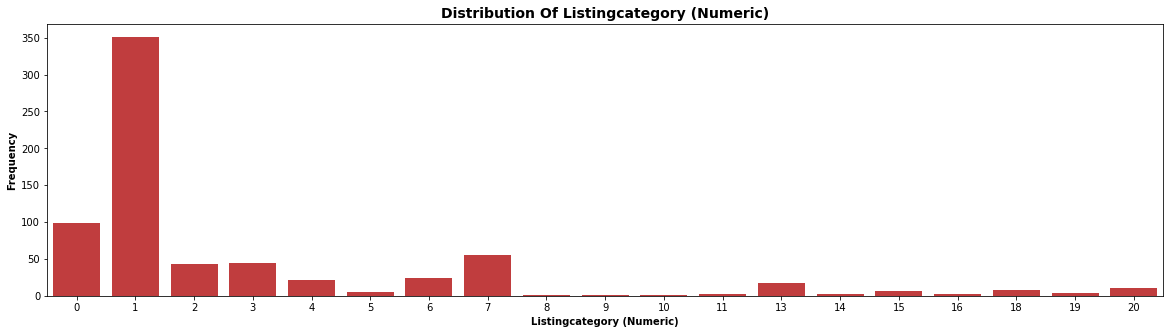

In [25]:
#ordinal categorical data (qualitative)

myCountPlot(df_new,'ListingCategory (numeric)',None);

#### Question : How are the listings distributed in terms of Employment Status?

#### Below is a a univariate visualization by Employment Status

#### Observation
We see that the employed people appear most in the listing records while the retired people appear the least.

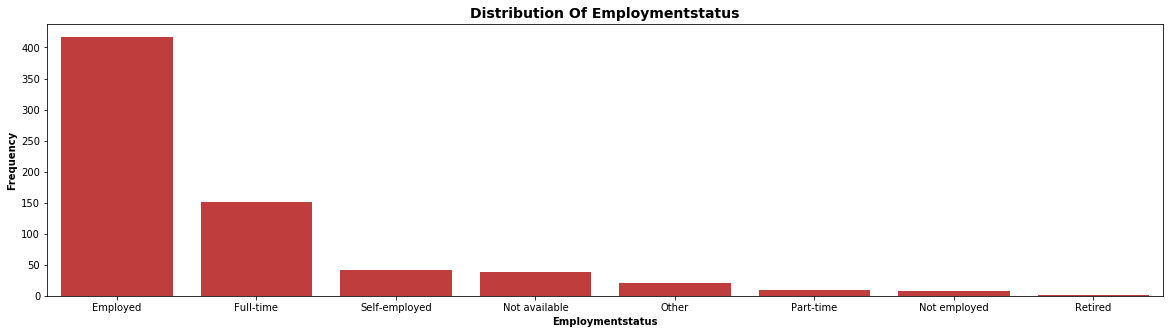

In [26]:
myCountPlot(df_new,'EmploymentStatus',employment_order);

#### Question : How are the listings distributed by Term?

#### Below is a a univariate visualization by Term

#### Observation
Most loans take 3 years, followed by 5 years and finally those that take only an year the least.

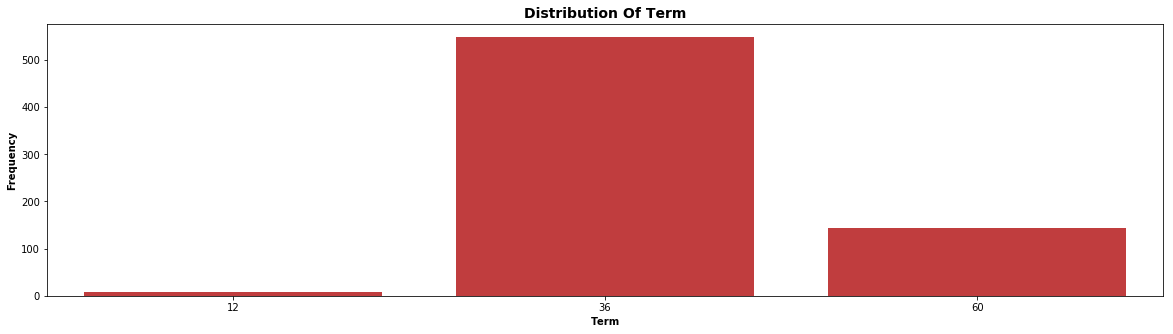

In [27]:
# quantitative continous data

myCountPlot(df_new,'Term',None);

#### Question : How are the listings distributed by Loan status?

#### Below is a a univariate visualization by Loan status

#### Observation
People currently having the loan are the most, followed by those who have completed their loans, with those on their final payment being the least.

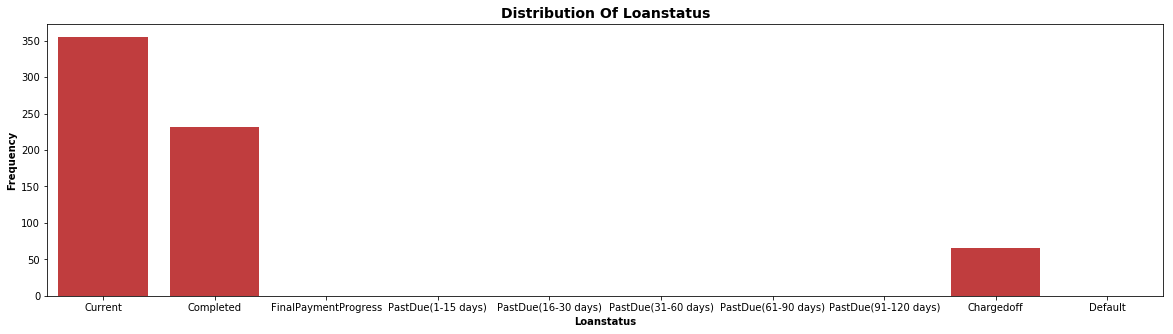

In [28]:
#Nominal categorical data (qualitative)
myCountPlot(df_new,'LoanStatus',LoanStatus_ordinal);

#### Question : How are the listings distributed depending on whether the borrower is a home owner?

#### Below is a a univariate visualization showing if borrower is homeowner or not

#### Observation
Most of them are not homeowners, but the diffrence is quite small.

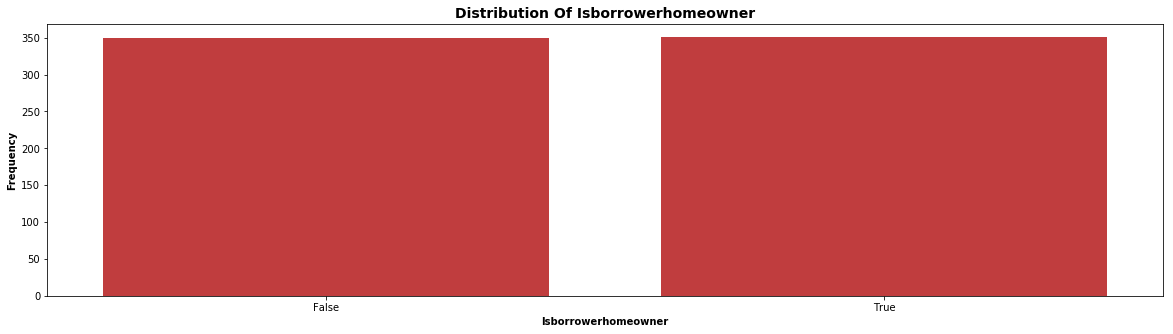

In [29]:
#Sorted qualitative (nominal categorical) data

myCountPlot(df_new,'IsBorrowerHomeowner',None);

#### Question : How are the listings distributed by Investment made by friends?

#### Below is a a univariate visualization by Investment made by friends

#### Observation
Most of the observations recorded had no investments made from friends

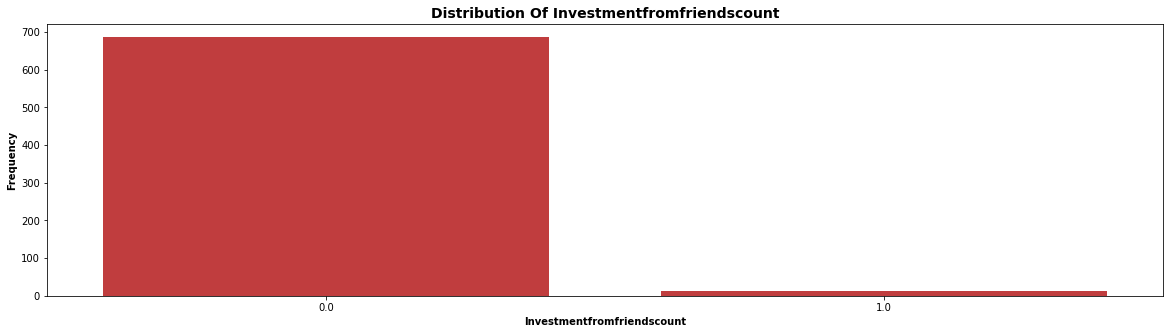

In [30]:
# quantiative data

myCountPlot(df_new,'InvestmentFromFriendsCount',None);

#### Question : How are the listings distributed by Income range?

#### Below is a a univariate visualization by income range

#### Observation
Most people had an income range between $50,000 - 74,999, while some took up the loan with no income and not employed.

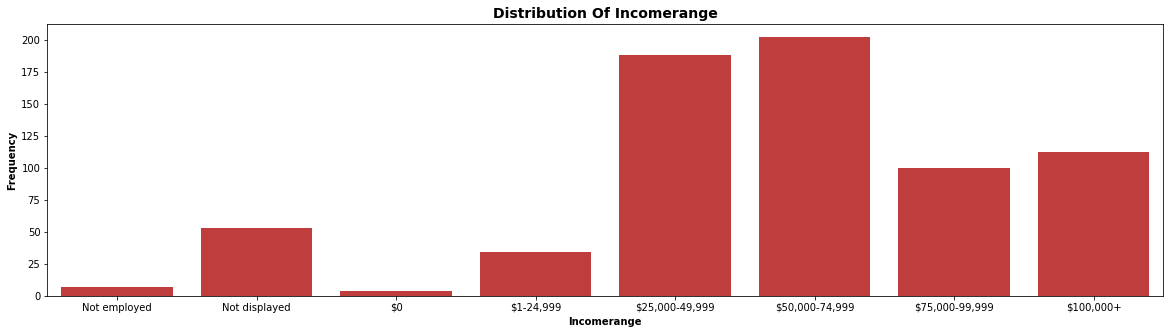

In [31]:
# quatitative

myCountPlot(df_new,'IncomeRange',None);

#### Question : How are the listings distributed by lower limit of credit score?

#### Below is a a univariate visualization by lower limit of credit score

#### Observation
Most borrowers had a lower limit of 680 credit score

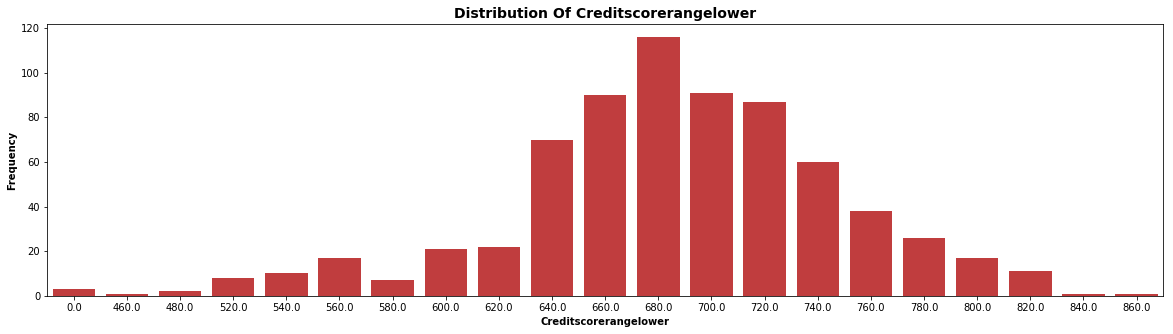

In [32]:
#continous quantitative data  needs hist

myCountPlot(df_new,'CreditScoreRangeLower',None);

#### Question : How are the listings distributed by upper limit of credit score

#### Below is a a univariate visualization by upper limit of credit score

#### Observation
Most borrowers had an upper limit credit score of 699

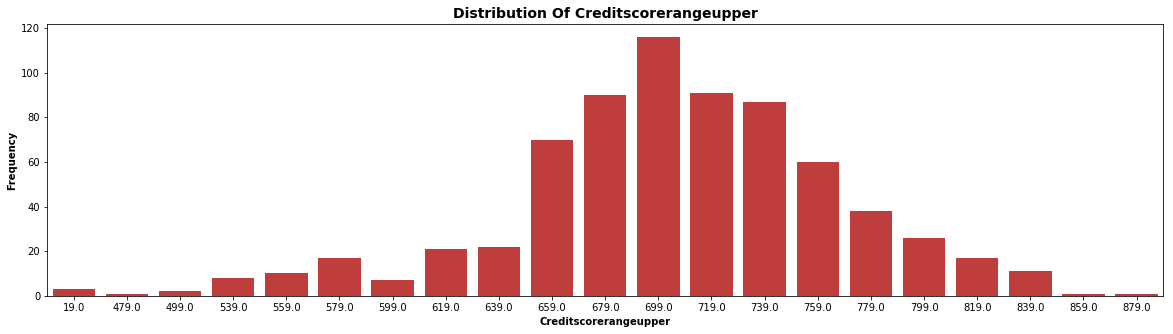

In [33]:
# quantitative data
myCountPlot(df_new,'CreditScoreRangeUpper',None);

#### Question : How are the listings distributed recommenadation?

#### Below is a a univariate visualization by Recommendation

#### Observation
People with no recommendations were the most borrowers. The is a high negative correlation whereby the more the recommendation the less the tendency to borrow.

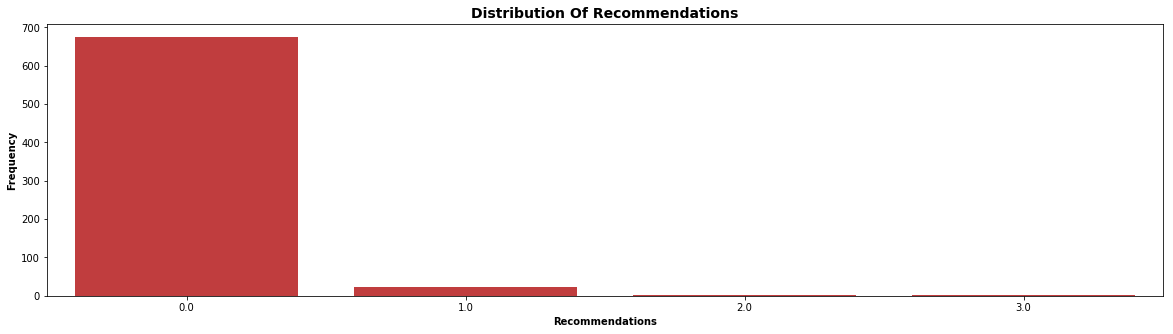

In [34]:
#discrete quantitative data

myCountPlot(df_new,'Recommendations',None);

#### Question : How are the listings distributed by credit grade rating?

#### Below is a a univariate visualization by credit grade rating

#### Observation
Credit  ratingB is the most popular among borrowers.

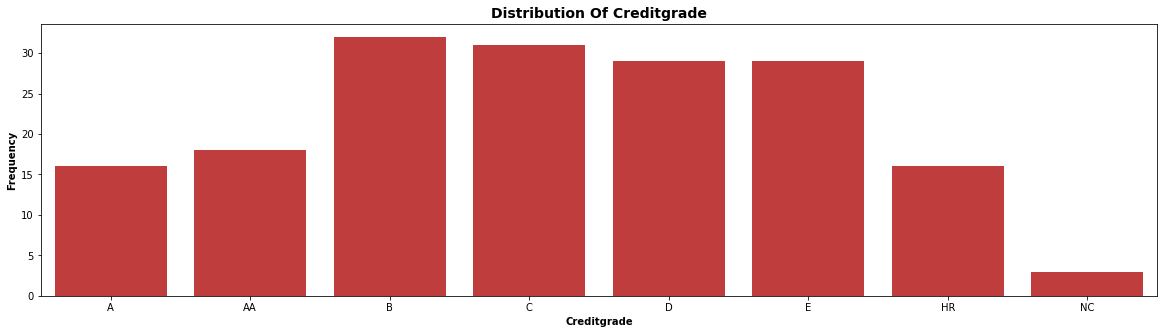

In [35]:
#nominal qualitative data

myCountPlot(df_new,'CreditGrade',None);

## Bivariate Exploration

In [46]:
def label(x,y,t):
    '''
    Args:
    x (str) : x label title
    y (str) : y label title
    t (str) : main title
    
    Returns:
    None
    
    '''
 
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show();
base_color = sb.color_palette()[3]

#### Question : What is the relationship between loan status and whether a borrower is a homeowner or not?

#### Below is the bivariate visualization 

#### Observation
Most borrowers currently having the loan are homeowners, while most of those who are not homeowners have completed their loans.

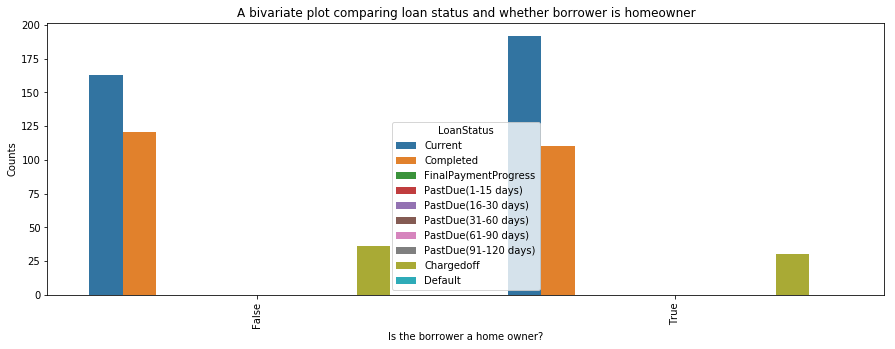

In [47]:
#compare loan status (qualitative) against occupation (qualitative)
plt.figure(figsize=[15,5])
sb.countplot(data=df_new, x='IsBorrowerHomeowner',hue='LoanStatus');
plt.xticks(rotation=90);
label('Is the borrower a home owner?','Counts','A bivariate plot comparing loan status and whether borrower is homeowner');

#### Question : What is the relationship between borrowers interest rate and occupation?

#### Below is the bivariate visualization 

#### Observation
Tradesman - Mechanic have the greatest amount of annual percentage interest rates. Borrowers Average Percentage rate also have a lot of outliers accross all occupations.

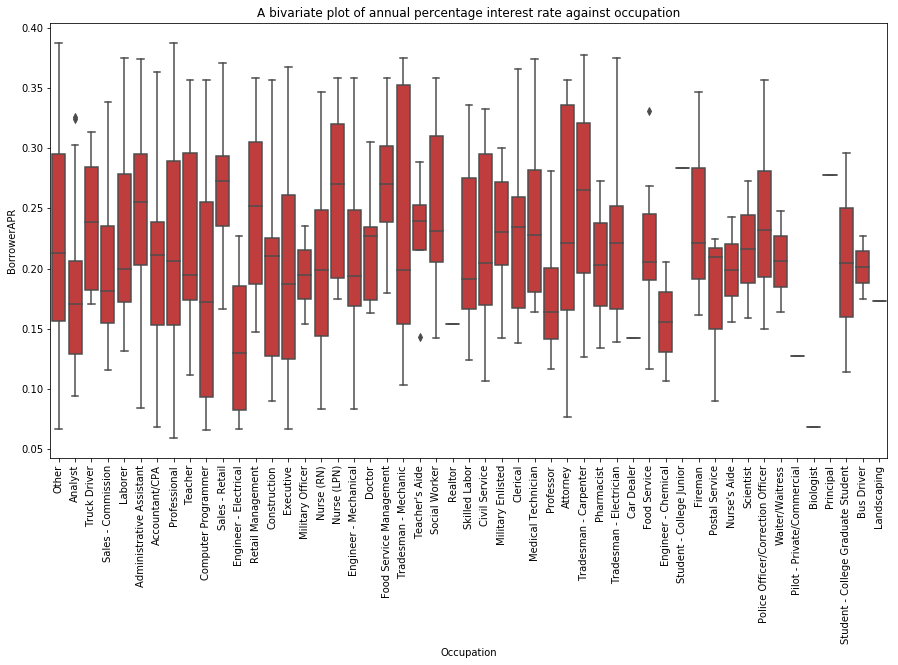

In [48]:
# compare borrowers interest (quantitative) and occupation (qualititative)
plt.figure(figsize=[15,8])
sb.boxplot(data=df_new, x='Occupation',y='BorrowerAPR',color=base_color );
plt.xticks(rotation=90);
label('Occupation','BorrowerAPR','A bivariate plot of annual percentage interest rate against occupation');

#### Question : What is the relationship betwwen loan original amount and lenderyield?

#### Below is the bivariate visualization 

#### Observation
There is a negative correlation between the origination amount of loan and the lenderyield. The lenderyield drops as the origination amount increases.

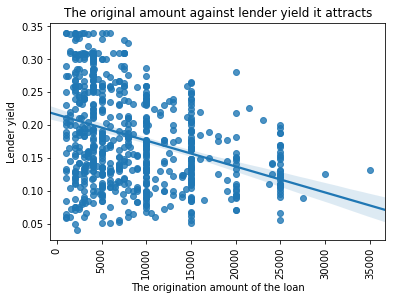

In [49]:
# compare loan original amount (quantitative) and lender yield (qualitative)
sb.regplot(data=df_new,x='LoanOriginalAmount', y='LenderYield')
plt.xticks(rotation=90);
label('The origination amount of the loan','Lender yield','The original amount against lender yield it attracts');

## Multivariate Exploration

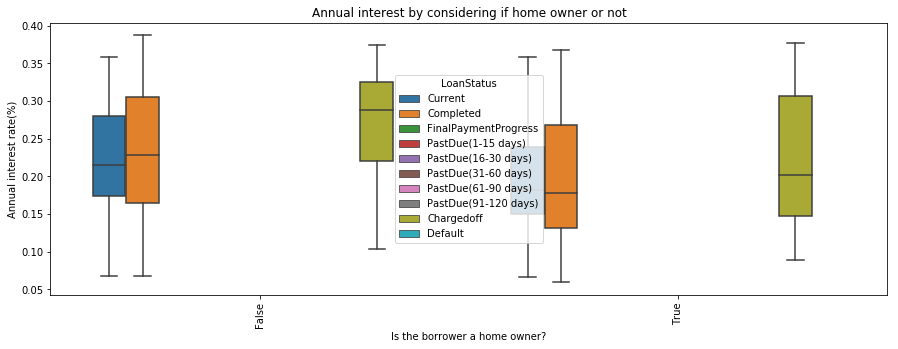

In [50]:
plt.figure(figsize=[15,5]);
sb.boxplot(data=df_new,x='IsBorrowerHomeowner',y='BorrowerAPR', hue='LoanStatus');
plt.xticks(rotation=90);
label('Is the borrower a home owner?','Annual interest rate(%)','Annual interest by considering if home owner or not');

#### Observation
>Loan status is affected by whether a borrower is a homeowner or not.

>Most of those borrowers who defaulted on their loans are not homeowners.

>The borrowers annual percentage interest rate is not fixed or predicatble, it is dependent on occupation.

>Borrowers annual percentage interest rates for homeowners are generally low.

>A large number of homeowners were charged off and highest annual interest rates were flagged on homweownwers who were past due (31-60 days)

## Conclusions
>The loan status is to a great extent, dependent on whether a borrower is a homeowner or not, since we see homeowners being the ones with the highest current loan, fewer completed loans but they also default less on their loans.This delay in loan completion could be due to them borrowing a lot to complete their projects that take time to bring in returns that would later be used to pay back their loans.